In [17]:
# Import all packages used 
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [18]:
# Assign file path to variable
city_filepath = os.path.join("raw_data/city_data.csv")
ride_filepath = os.path.join("raw_data/ride_data.csv")
# Read file using the above variables
ride_data_df = pd.read_csv(ride_filepath)
city_data_df = pd.read_csv(city_filepath)
# Set index to append aggregated columns to the city data
city_data_df = city_data_df.set_index('city')
# Display Sample  city data
city_data_df.head()

,driver_count,type
city,,
Kelseyland,63,Urban
Nguyenbury,8,Urban
East Douglas,12,Urban
West Dawnfurt,34,Urban
Rodriguezburgh,52,Urban


In [19]:
# Perform group by city operation on ride data
grp_ride_data_df = ride_data_df.groupby('city')
# Derive the caluculations required for creating bubble chart
#Average Fare ($) Per City
avg_fare_ride_data_df = pd.DataFrame(grp_ride_data_df["fare"].mean())
sum_fare_ride_data_df = pd.DataFrame(grp_ride_data_df["fare"].sum())
#Total Number of Rides Per City
Total_Ride_Count = pd.DataFrame(ride_data_df["city"].value_counts())
# Append all derived cloumns to the city data dataframe
city_data_df["Avg_Fare"] = avg_fare_ride_data_df
city_data_df["Total_Fare"] = sum_fare_ride_data_df
city_data_df["Total_Ride_Count"] = Total_Ride_Count
# Display new sample data for city data 
city_data_df.head()

,driver_count,type,Avg_Fare,Total_Fare,Total_Ride_Count
city,,,,,
Kelseyland,63,Urban,21.806429,610.58,28
Nguyenbury,8,Urban,25.899615,673.39,26
East Douglas,12,Urban,26.169091,575.72,22
West Dawnfurt,34,Urban,22.330345,647.58,29
Rodriguezburgh,52,Urban,21.332609,490.65,23


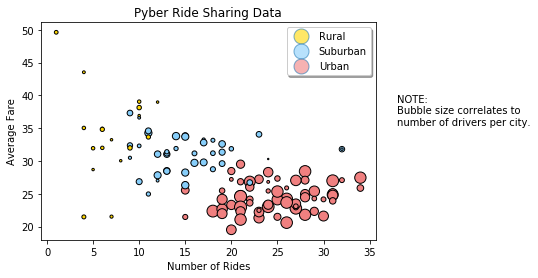

In [20]:
# Assign x, y and z axes for the plot
x = city_data_df['Total_Ride_Count']
y = city_data_df['Avg_Fare']
z = city_data_df['driver_count']*2
# Desired colurs that need to be provided for lables
colors = ['gold', 'lightskyblue', 'lightcoral']
labels = ['Rural', 'Suburban', 'Urban']
def attribute_color(type):
    colors = {
        'Rural':'gold',
        'Suburban':'lightskyblue',
        'Urban':'lightcoral'}
    return colors.get(type, 'black')
color_region = list()

# Derive color for bubble based on the type of city 
qty_cities = city_data_df['type'].value_counts().sum()
for city in range(qty_cities):
    color_region.append(attribute_color(city_data_df['type'][city]))                        

# Assign lables for axes and text for plot legend and description    
plt.scatter(x, y, z, c=color_region, edgecolors='black' )
plt.title('Pyber Ride Sharing Data')
plt.xlabel('Number of Rides')
plt.ylabel('Average Fare')
plt.text(38,35.5,'NOTE: \nBubble size correlates to  \nnumber of drivers per city.')
legend1_line2d = list()
for step in range(len(colors)):
    legend1_line2d.append(mlines.Line2D([0], [0],
                                        linestyle='none',
                                        marker='o',
                                        alpha=0.6,
                                        markersize=15,
                                        markerfacecolor=colors[step]))
 
legend1 = plt.legend(legend1_line2d,
                     labels,
                     numpoints=1,
                     fontsize=10,
                     loc='best',
                     shadow=True)

# Display plot
plt.show()

In [21]:
# Get section of above data frame required for Pie charts and display sample data
sub_city_data_df = city_data_df.set_index('type')
sub_city_data_df.head()

,driver_count,Avg_Fare,Total_Fare,Total_Ride_Count
type,,,,
Urban,63,21.806429,610.58,28
Urban,8,25.899615,673.39,26
Urban,12,26.169091,575.72,22
Urban,34,22.330345,647.58,29
Urban,52,21.332609,490.65,23


In [22]:
# Group the sub data set based on City type
gsjdf = sub_city_data_df.groupby('type')
# Derive aggregated calculations from the dataframe grouped on city type.
gsumdriver = pd.DataFrame(gsjdf["driver_count"].sum())
gridecount = pd.DataFrame(gsjdf["Total_Ride_Count"].sum())
gsumfare = pd.DataFrame(gsjdf["Total_Fare"].sum())

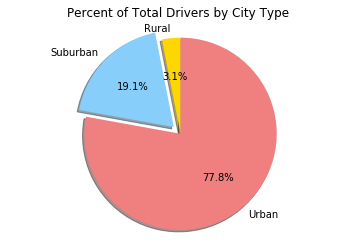

In [23]:
# Assign values for lables and colur for the pie
labels = gsumdriver.index
sizes =  gsumdriver
explode = (0, 0.1, 0)  
colors = ['gold', 'lightskyblue', 'lightcoral']
# Specifications for the plots
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, colors=colors, autopct='%1.1f%%',explode=explode,
        shadow=True, startangle=90)
# Title for the plot
plt.axis('equal')  
plt.title("Percent of Total Drivers by City Type")
plt.show()

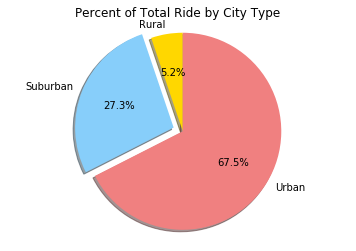

In [24]:
# Assign values for lables and colur for the pie
labels = gridecount.index
sizes =  gridecount
explode = (0, 0.1, 0)  
colors = ['gold', 'lightskyblue', 'lightcoral']
# Specifications for the plots
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, colors=colors, autopct='%1.1f%%',explode=explode,
        shadow=True, startangle=90)
# Title for the plot
plt.axis('equal')
plt.title("Percent of Total Ride by City Type")
plt.show()

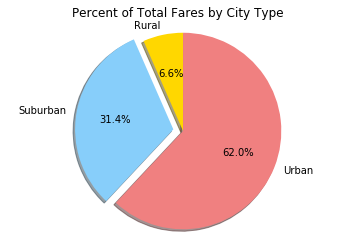

In [25]:
# Assign values for lables and colur for the pie
labels = gsumfare.index
sizes =  gsumfare
explode = (0, 0.1, 0)
colors = ['gold', 'lightskyblue', 'lightcoral']
# Specifications for the plots
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, colors=colors, autopct='%1.1f%%',explode=explode,
        shadow=True, startangle=90)
# Title for the plot 
plt.axis('equal')
plt.title("Percent of Total Fares by City Type")
plt.show()